## Decision Tree regresija

In [1]:
# Importuojam bibliotekas
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

# Įkeliame duomenis iš pateikto failo
data = pd.read_csv('data_visi_v2.csv')

# Pasiruošiame duomenis
X = data.drop(columns=['KIEKIS'])
y = data['KIEKIS']

# Padalijame į treniravimo ir testavimo rinkinius
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalizuojame duomenis
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Sukuriame Decision Tree Regressor
regressor = DecisionTreeRegressor(random_state=42)

In [2]:
# Nustatome hiperparametrų tinklą
param_grid = {
    'max_depth': [3, 5, 7, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}


In [3]:
# Naudojame GridSearchCV geriausiems parametrams rasti
grid_search = GridSearchCV(estimator=regressor, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [3, 5, 7, 10, None],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='neg_mean_squared_error')

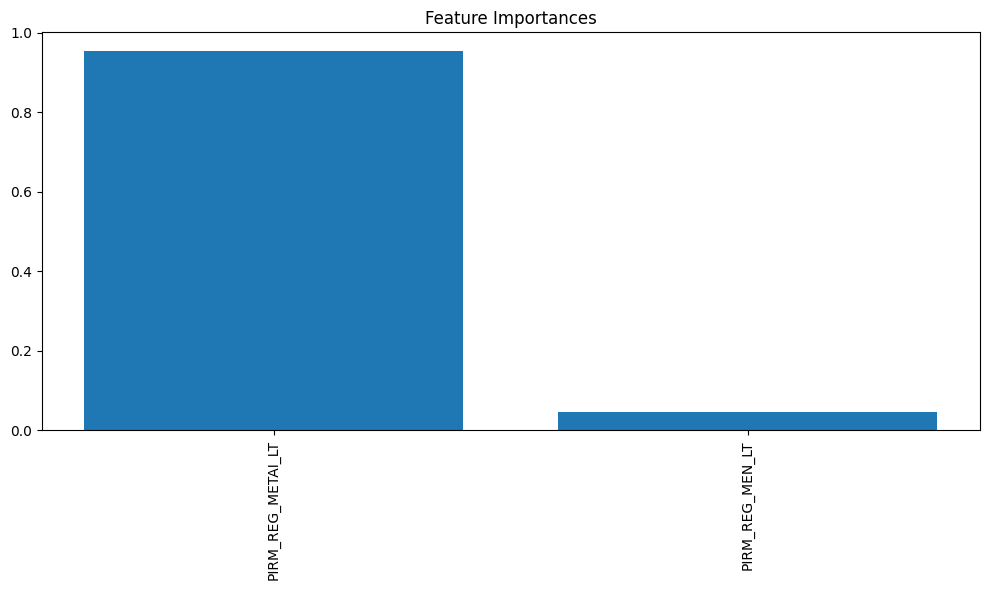

Geriausi parametrai: {'max_depth': 7, 'min_samples_leaf': 2, 'min_samples_split': 10}
Treniravimo MSE: 716083.7674259768
Testavimo MSE: 1543705.902362574
Treniravimo R2: 0.9741584240071876
Testavimo R2: 0.9422970352034024
Kryžminės validacijos (cv=5) R2 reikšmės: [0.97192304 0.87751251 0.93481694 0.95711121 0.94063671]
Kryžminės validacijos (cv=5) vidutinis R2: 0.9364000821923281
Kryžminės validacijos (cv=10) R2 reikšmės: [0.97920162 0.94958321 0.77674912 0.96972358 0.92082802 0.96522139
 0.96450919 0.94907001 0.92528575 0.94976563]
Kryžminės validacijos (cv=10) vidutinis R2: 0.9349937524298655


In [4]:
# Geriausi parametrai
best_params = grid_search.best_params_

# Geriausias modelis
best_model = grid_search.best_estimator_

# Atliekame prognozes su geriausiu modeliu
y_train_pred = best_model.predict(X_train_scaled)
y_test_pred = best_model.predict(X_test_scaled)

# Vertiname modelį
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

# Kryžminė validacija su pilnu duomenų rinkiniu
X_combined = pd.concat([X_train, X_test])
y_combined = pd.concat([y_train, y_test])
X_combined_scaled = scaler.fit_transform(X_combined)

cv_scores_5 = cross_val_score(best_model, X_combined_scaled, y_combined, cv=5, scoring='r2')
cv_scores_10 = cross_val_score(best_model, X_combined_scaled, y_combined, cv=10, scoring='r2')

# Požymių svarba
feature_importances = best_model.feature_importances_
features = X.columns

# Požymių svarbos vizualizacija
indices = np.argsort(feature_importances)[::-1]
plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.bar(range(X.shape[1]), feature_importances[indices], align="center")
plt.xticks(range(X.shape[1]), features[indices], rotation=90)
plt.tight_layout()
plt.show()

# Rezultatų spausdinimas
print(f'Geriausi parametrai: {best_params}')
print(f'Treniravimo MSE: {train_mse}')
print(f'Testavimo MSE: {test_mse}')
print(f'Treniravimo R2: {train_r2}')
print(f'Testavimo R2: {test_r2}')

print(f'Kryžminės validacijos (cv=5) R2 reikšmės: {cv_scores_5}')
print(f'Kryžminės validacijos (cv=5) vidutinis R2: {cv_scores_5.mean()}')

print(f'Kryžminės validacijos (cv=10) R2 reikšmės: {cv_scores_10}')
print(f'Kryžminės validacijos (cv=10) vidutinis R2: {cv_scores_10.mean()}')


### modelis nepasirenkamas dėl per dilelio skirtumo tarp MSE reikšmių